# Frequency Modulated Continuous Radar (FMCW)
# FMCW Radar with Multiple Target
### Radar and Navigation - #2 Coding Task

---

*Developed by:*<br>
Naufal Mu'afi - 20/456724/TK/50548<br>
Department of Electrical and Information Engineering - UGM<br>
naufalmuafi@mail.ugm.ac.id<br>

---

First, let's begin by importing the necessary modules for our program.

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

Secondly, let's move on to defining the constant and variable parameters for the Frequency Modulated Continuous Wave (FMCW) radar system.

In [141]:
# Constant
c = 3e8

# FMCW Signal Parameters
fc = 15e6    # Carrier Frequency (Hz)
bw = 1e5     # Bandwidth (Hz)
fr = 2       # Chirp Frequency (Hz)
tr = 1/fr    # Chirp period (Hz)

# Radar Parameter
Pt = 1   # 1 W transmit power
Gt = 1   # tranmitter antenna Gain
ar = 1   # effective apperture receiver antena

# List of Target
Rt = np.array([40, 45, 50, 55, 60]) * 1e3
RCSt = np.array([10, 20, 10, 15, 25])
Vt = np.array([10, 0, 15, 7, 12])

# Time Range
ns = 2**10                  # number of sample
tg = np.linspace(0, 1, ns)  # generation of time vector

Next, the first step in working with an FMCW radar system is to generate the transmitted signal. This signal is characterized by its frequency modulation as it continuously sweeps from a starting frequency to an ending frequency over a defined sweep time.

In [142]:
"""

Transmitted FMCW Signal Generation

"""

# initial condition
st = np.zeros(ns, dtype=complex)  # transmitted signal
ft = np.zeros(ns)                 # frequency of transmitted signal/sampling freq.

# Sampling Frequency (Hz)
for i in range(len(tg)):
    tg_i = tg[i]       # take the time value of the tg vector
    
    # for the chirp period after the first period
    while tg_i > tr:
        tg_i -= tr
        
    tg_i -= tr/2       # so that the frequency ft becomes the middle frequency
    st[i] = np.cos(2*np.pi*fc*tg_i + np.pi*bw*fr*(tg_i**2))
    ft[i] = fc + bw*fr*tg_i

After successfully sampling the transmitted FMCW signal, we can plot both the transmitted FMCW signal and its frequency variation. To do this, we can utilize the samples that we've collected and calculate the instantaneous frequency at each time step.

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


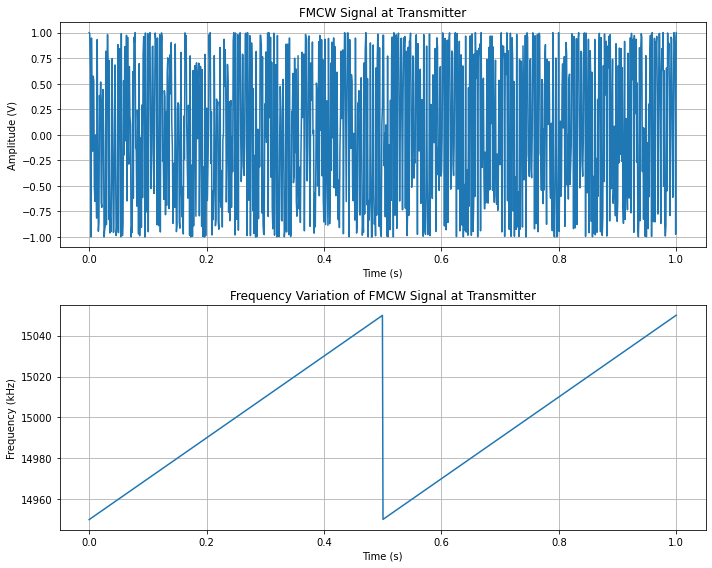

In [143]:
"""

FMCW Signal Plot

"""

# Transmiited FMCW Signal
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.plot(tg, st)
plt.title('FMCW Signal at Transmitter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

# Frequency Variation
plt.subplot(2, 1, 2)
plt.plot(tg, ft/1000)
plt.title('Frequency Variation of FMCW Signal at Transmitter')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.grid(True)

plt.tight_layout()
plt.show()

Next, let's assume that our radar system has detected a **target**, which happens to be a ship.

The second step in working with an FMCW radar system is to generate the received signal. This signal is characterized by its interaction with the target, which results in a radar echo. The received signal contains valuable information about the target's properties

In [144]:
"""

FMCW Signal Generation at Receiver/Reflected Signal

"""

# initial condition
srx = np.zeros(len(tg))  # receiver signal that transmitted

for j in range(len(Rt)):
    rt = Rt[j]
    rcs = RCSt[j]    
    vt = Vt[j]

    for i in range(len(tg)):
        tg_i = tg[i]       # take the time value of the tg vector
        
        # calculate the time delay for receiving signals due to the distance factor
        t_delay = 2*rt/c
        # calculates the signal time delay due to target movement
        t_delay += (2*tg_i*vt/c)
        
        tg_i -= t_delay
        
        # for the chirp period after the first period
        while tg_i > tr:
            tg_i -= tr
        
        tg_i -= tr/2       # so that the frequency ft becomes the middle frequency
        
        ampx = np.sqrt(Pt * ar * Gt * rcs / ((4 * np.pi) ** 2 * rt ** 4))
        srx[i] += ampx * np.cos(2 * np.pi * fc * tg_i + np.pi * bw * fr * (tg_i**2))


After successfully sampling the FMCW signal at Receiver, we can plot both the signal and its frequency variation. To do this, we can utilize the samples that we've collected and calculate the instantaneous frequency at each time step.

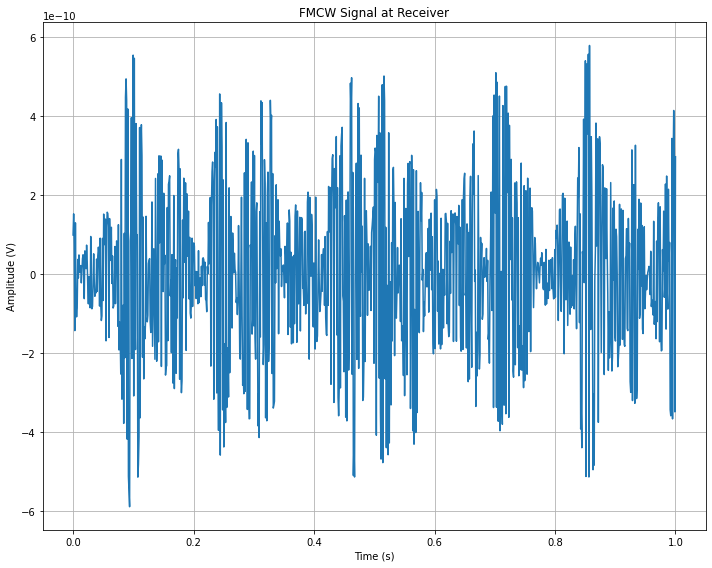

In [145]:
"""

FMCW Signal at Receiver Plot

"""

# FMCW Signal at Receiver
plt.figure(figsize=(10,8))
plt.plot(tg, srx)
plt.title('FMCW Signal at Receiver')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

plt.tight_layout()
plt.show()

Then, we can process the signal using a demodulation method, which will generate the plot of the received FMCW signal in the time domain and we can convert to frequency domain with FFT.

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


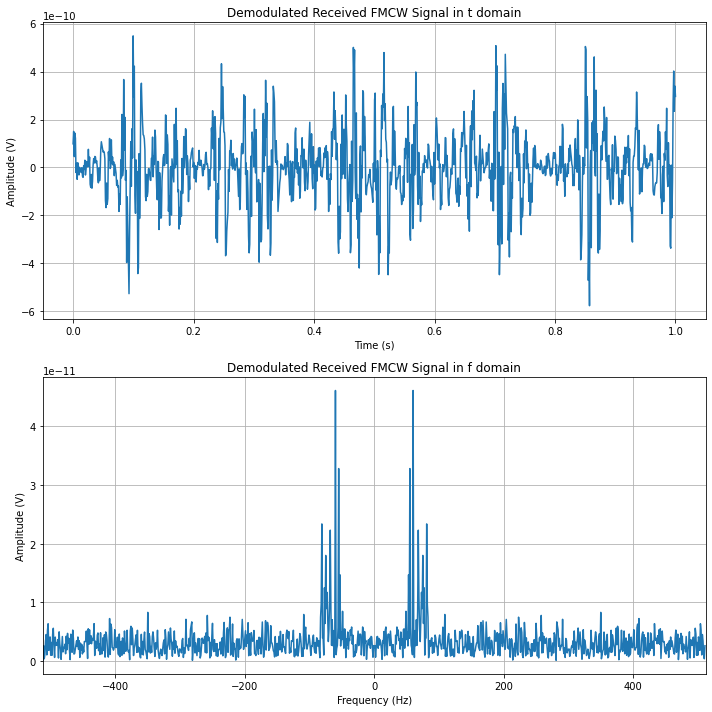

In [146]:
"""

Signal Processing

"""

# Demodulation
s_demod = srx * st

"""

Convert to Frequency Domain with FFT

"""

n_fft = 2**int(np.ceil(np.log2(len(s_demod))))
s_fft = np.fft.fftshift(np.fft.fft(s_demod, n_fft) / len(tg))
f_axis = np.fft.fftshift(np.fft.fftfreq(n_fft, d=1/ns))

# Plot with Demodulation
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(tg, s_demod)
plt.title('Demodulated Received FMCW Signal in t domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(f_axis, np.abs(s_fft))
plt.xlim([-ns/2, ns/2])
plt.title('Demodulated Received FMCW Signal in f domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (V)')
plt.grid(True)

plt.tight_layout()
plt.show()

after success to plot, then we can get the total of target to clarify and analyze the plot

In [147]:
# Identify the peak frequency by using the median value of the signal in the FFT
th = 1e-11
m = len(s_fft) // 2

peak, _ = find_peaks(np.abs(s_fft[m:]), height=th)
fd = f_axis[m + peak]
Av = np.abs(s_fft[m + peak])

print(f"Peak Frequencies: {fd} Hz")

# Calculate Target Range
rest = c * fd * tr / (2*bw)
print(f"Estimated target range: {rest/1000} km")

Peak Frequencies: [53. 55. 60. 68. 73. 75. 77. 81.] Hz
Estimated target range: [39.75 41.25 45.   51.   54.75 56.25 57.75 60.75] km


In [148]:
data = {
    "Frequencies (Hz)": fd,
    "Amplitude (V)": [f"{v:.2e}" for v in Av],
    "Range (km)": rest/1000
}

# Total Target
total_target = len(fd)

# Create DataFrame
df = pd.DataFrame(data)

# Add "Total Target" row
total_target_row = pd.DataFrame({
    "Frequencies (Hz)": [f"Total Target = {total_target}"],
    "Amplitude (V)": [""],
    "Range (km)": [""]
})
df = pd.concat([df, total_target_row], ignore_index=True)

# Set index to an empty string
df.index = [''] * len(df)

# Print DataFrame without the index column
print(df.to_string(index=False))

Frequencies (Hz) Amplitude (V) Range (km)
            53.0      1.47e-11      39.75
            55.0      3.28e-11      41.25
            60.0      4.61e-11       45.0
            68.0      2.23e-11       51.0
            73.0      1.17e-11      54.75
            75.0      1.80e-11      56.25
            77.0      1.25e-11      57.75
            81.0      2.34e-11      60.75
Total Target = 8                         


<hr>